In [43]:
# Merge the data files 
import pandas as pd
import glob

path = r'USAData' # use your path

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

# Create csv file
frame.to_csv('USAData/out.csv', index=False)

In [105]:
# Get Data for a particular State
def get_state_data(state_name):
    state_df=frame[frame['USAState'].str.contains(state_name)]
    state_df=state_df.sort_values(by=['Date'])

    # Cleaning the code
    for column in state_df.columns:
        state_df[column] = state_df[column].replace({'\n':''}, regex=True)
        state_df[column] = state_df[column].replace({'\+':''}, regex=True)
        state_df[column] = state_df[column].replace({' ':''}, regex=True)
        state_df[column] = state_df[column].replace({',':''}, regex=True)
        
    return state_df    

In [205]:
import matplotlib.pyplot as plt

# Function to Plot Graph
# create a figure and axis
def get_state_plot_column(state_names, column_name):
    fig, ax = plt.subplots()
    for state_name in state_names:
        state_df=get_state_data(state_name)
        # scatter the sepal_length against the sepal_width
        x = state_df['Date']
        y = state_df[column_name].astype(int)
        ax.plot(x, y)
        ax.set_xticks(x[::5])
        ax.set_xticklabels(x[::5], rotation=45)
        #plt.xticks(np.arange(min(state_df['Date']), max(state_df['Date'])+1, 1.0))
        # set a title and labels
        ax.set_title('Date_vs_' + column_name)
        ax.set_xlabel('Date')
        ax.set_ylabel(column_name)
        
    plt.legend(state_names)
    
def get_state_plot_Deaths_to_Cases(state_names):
    fig, ax = plt.subplots()   
    for state_name in state_names:
        state_df=get_state_data(state_name)
        # scatter the sepal_length against the sepal_width
        x = state_df['Date']
        y = state_df['TotalDeaths'].astype(int)/state_df['TotalCases'].astype(int) * 100
        ax.plot(x, y)
        ax.set_xticks(x[::5])
        ax.set_xticklabels(x[::5], rotation=45)
        #plt.xticks(np.arange(min(state_df['Date']), max(state_df['Date'])+1, 1.0))
        # set a title and labels
        ax.set_title('Date vs Percent Deaths  (Deaths:Cases)')
        ax.set_xlabel('Date')
        ax.set_ylabel('Percent Deaths')

    plt.legend(state_names)

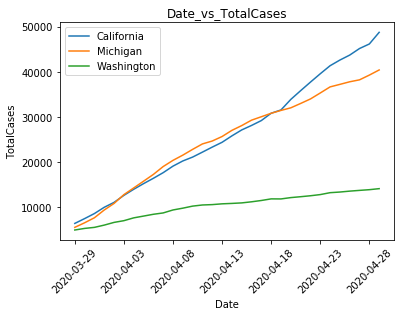

In [216]:
get_state_plot_column(['California', 'Michigan', 'Washington'], 'TotalCases')

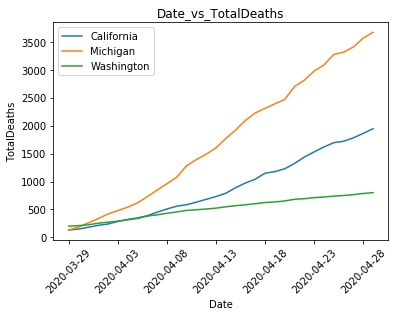

In [217]:
get_state_plot_column(['California', 'Michigan', 'Washington'], 'TotalDeaths')

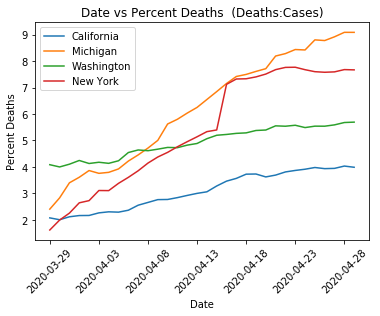

In [218]:
get_state_plot_Deaths_to_Cases(['California','Michigan', 'Washington', 'New York'])